# 案例：电信客户流失 - 数据可视化

In [1]:
import os
import sys
import pandas as pd

path = os.path.dirname(os.getcwd())
sys.path.append(path)

from common.filesio import FilesIO

data = pd.read_csv(FilesIO.getLectureData('Telco-Customer-Churn.csv'))
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
print(data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


### TotalCharges 数据类型不对，需转变成数值形式

In [4]:
# Converting Total Charges to a numerical data type.
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')  ## errors='coerce': 无效的值将被设为NaN
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### 去掉含有NaN的行（实例）

In [5]:
# drop missing cases
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [6]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## 1. 客户流失比例

饼图(pie plot)

plt.pie(x, labels=,autopct=,colors)

x:数量，自动算百分比

labels:每部分名称

autopct:占比显示指定 %1.2f%%

colors:每部分颜色

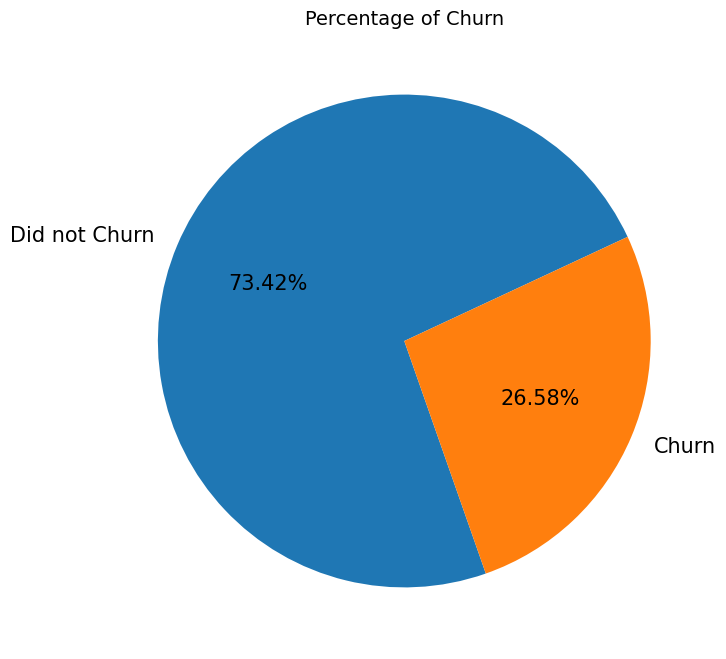

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))

#colors = ["#FA5858", "#64FE2E"]
labels ="Did not Churn", "Churn"

count = data["Churn"].value_counts()

# Change label fontsize
textprops = {"fontsize":15}

plt.pie(count,  autopct='%1.2f%%', labels=labels,  startangle=25, textprops =textprops)

plt.title("Percentage of Churn", fontsize=14)
plt.show()

### 存储图片

plt.savefig： plt.savefig('path/figname.png') 

In [8]:
plt.figure(figsize=(8,8))

#colors = ["#FA5858", "#64FE2E"]
labels ="Did not Churn", "Churn"

count = data["Churn"].value_counts()

# Change label fontsize
textprops = {"fontsize":15}

plt.pie(count,  autopct='%1.2f%%', labels=labels,  startangle=25, textprops =textprops)

plt.title("Percentage of Churn", fontsize=14)
plt.savefig('churn_rate.png') ## 图片文件名，可以在前面设置路径
plt.savefig('churn_rate.pdf')
plt.close() ## 关闭图片窗口

## 2. 对流失用户进行性别、年龄、家庭情况进行画像

### 2.1 性别对客户流失的影响

以条形(bar)的形式展示每个类别的数量：sns.countplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)



x： x轴上的条形图，以x标签划分统计个数

y：y轴上的条形图，以y标签划分统计个数

hue：在x或y标签划分的同时，再以hue标签划分统计个数

data：df或array或array列表，用于绘图的数据集，x或y缺失时，data参数为数据集，同时x或y不可缺少，必须要有其中一个

order, hue_order：分别是对x或y的字段排序，hue的字段排序。排序的方式为列表

orient：强制定向，v:竖直方向；h:水平方向

palette：使用不同的调色板

ax：画子图的时候

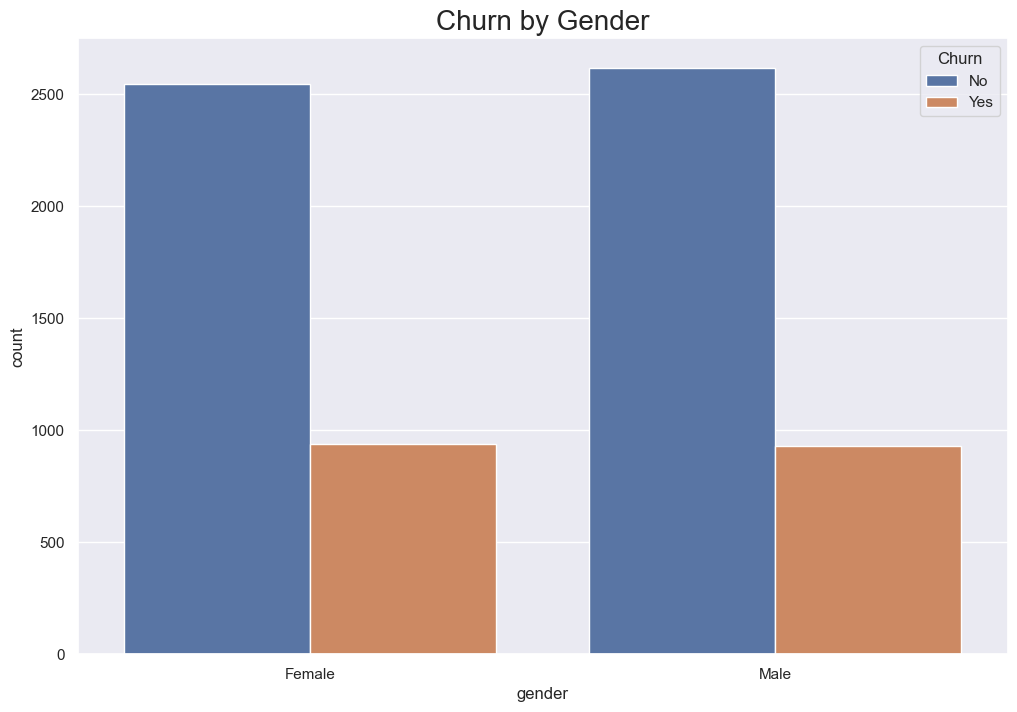

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(12,8)})

#total = data["gender"].value_counts()
ax = sns.countplot(x = "gender", hue = "Churn", data = data)

# 设置图片标题
plt.title('Churn by Gender', fontsize=20)
    
plt.show()

### 女性客户流失率、男性客户流失率

In [10]:
count = data.groupby('gender')['Churn'].value_counts() ## 在男性中流失和未流失人数、在女性中流失和未流失人数

count

gender  Churn
Female  No       2544
        Yes       939
Male    No       2619
        Yes       930
Name: Churn, dtype: int64

In [11]:
proportions = data.groupby('gender')['Churn'].value_counts(normalize=True)
proportions

gender  Churn
Female  No       0.730405
        Yes      0.269595
Male    No       0.737954
        Yes      0.262046
Name: Churn, dtype: float64

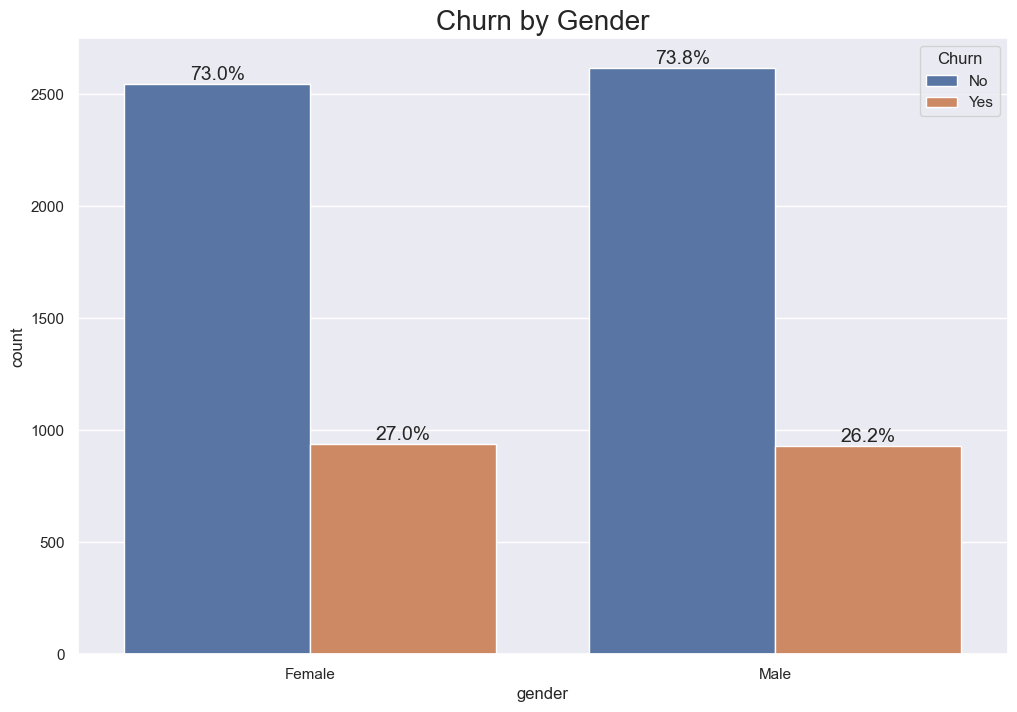

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

## 定义函数percentage_above_bar_relative_to_xgroup， 使得流失百分比显示在条形上方
# 在matplotlib和seaborn中，子地块称为“ax”。seaborn条形图中的条形图是有组织的，首先是属于第一个色调值的所有条形图，然后是第二个，以此类推。
def percentage_above_bar_relative_to_xgroup(ax):
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=14, ha='center', va='bottom')
            

sns.set(rc={'figure.figsize':(12,8)})

#total = data["gender"].value_counts()
ax = sns.countplot(x = "gender", hue = "Churn", data = data)
percentage_above_bar_relative_to_xgroup(ax)

# 设置图片标题
plt.title('Churn by Gender', fontsize=20)

    
plt.show()

### 2.2 年龄（是否为老年人）对客户流失的影响

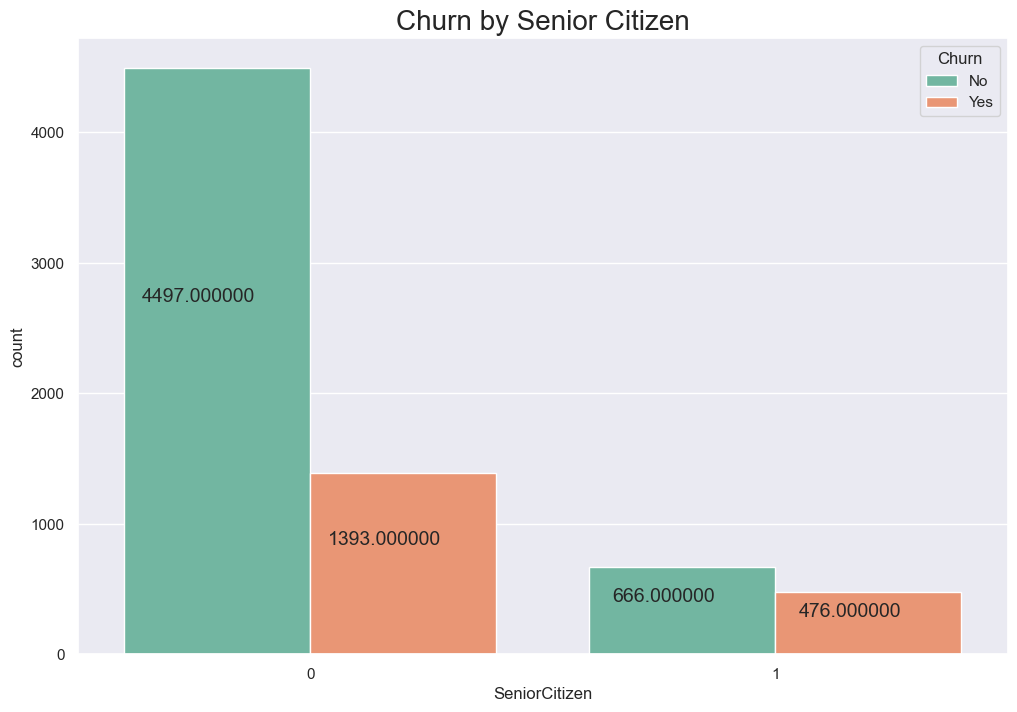

In [13]:
sns.set(rc={'figure.figsize':(12,8)})

#total = data["gender"].value_counts()
ax = sns.countplot(x = "SeniorCitizen", hue = "Churn", data = data, palette = 'Set2')

# 设置图片标题
plt.title('Churn by Senior Citizen', fontsize=20)

# 在条形上显示流失/不流失的个数
for p in ax.patches:
    x = p.get_x()+.4*p.get_width()
    y = p.get_height()-0.4*p.get_height()
    ax.annotate('{:f}'.format(p.get_height()), (x, y),ha='center', size = 14)
    
plt.show()

In [14]:
data.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True)

SeniorCitizen  Churn
0              No       0.763497
               Yes      0.236503
1              No       0.583187
               Yes      0.416813
Name: Churn, dtype: float64

### 2.3 是否有伴侣对客户流失的影响

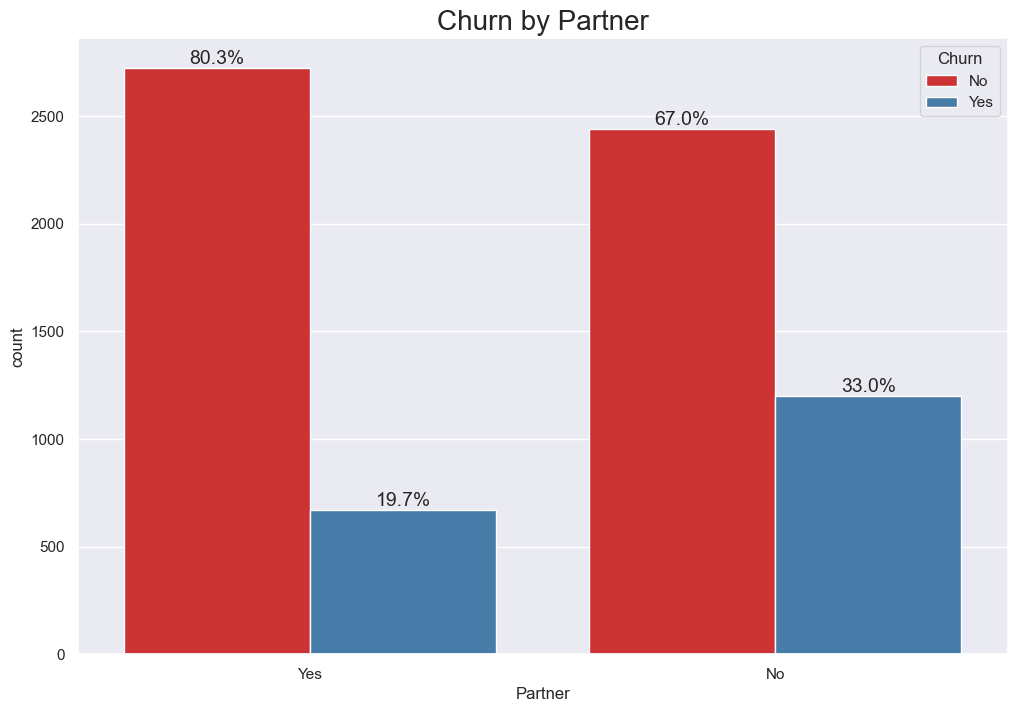

In [15]:
sns.set(rc={'figure.figsize':(12,8)})

#total = data["gender"].value_counts()
ax = sns.countplot(x = "Partner", hue = "Churn", data = data, palette = 'Set1')
percentage_above_bar_relative_to_xgroup(ax)
# 设置图片标题
plt.title('Churn by Partner', fontsize=20)

plt.show()

In [16]:
data.groupby('Partner')['Churn'].value_counts(normalize=True)

Partner  Churn
No       No       0.670239
         Yes      0.329761
Yes      No       0.802829
         Yes      0.197171
Name: Churn, dtype: float64

### 2.4 是否有家属对客户流失的影响

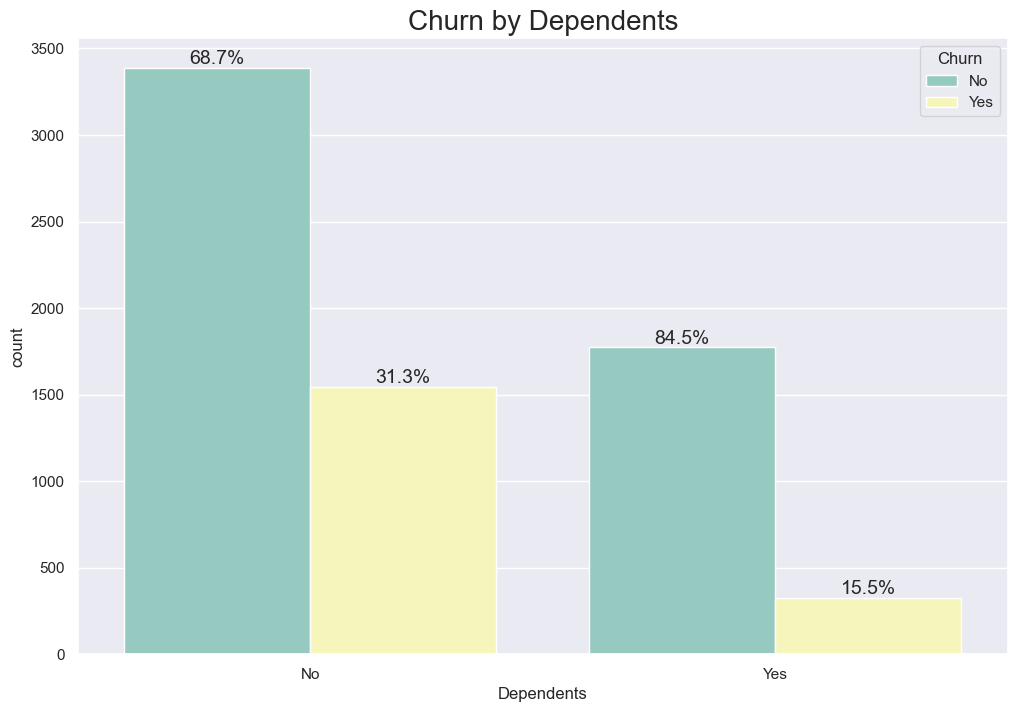

In [17]:
sns.set(rc={'figure.figsize':(12,8)})

#total = data["gender"].value_counts()
ax = sns.countplot(x = "Dependents", hue = "Churn", data = data, palette = 'Set3')
percentage_above_bar_relative_to_xgroup(ax)
# 设置图片标题
plt.title('Churn by Dependents', fontsize=20)

plt.show()

In [18]:
data.groupby('Dependents')['Churn'].value_counts(normalize=True)

Dependents  Churn
No          No       0.687209
            Yes      0.312791
Yes         No       0.844688
            Yes      0.155312
Name: Churn, dtype: float64

## 3. 对客户开通的电信业务进行画像

### 3.1 客户使用该电信公司业务的月数 tenure

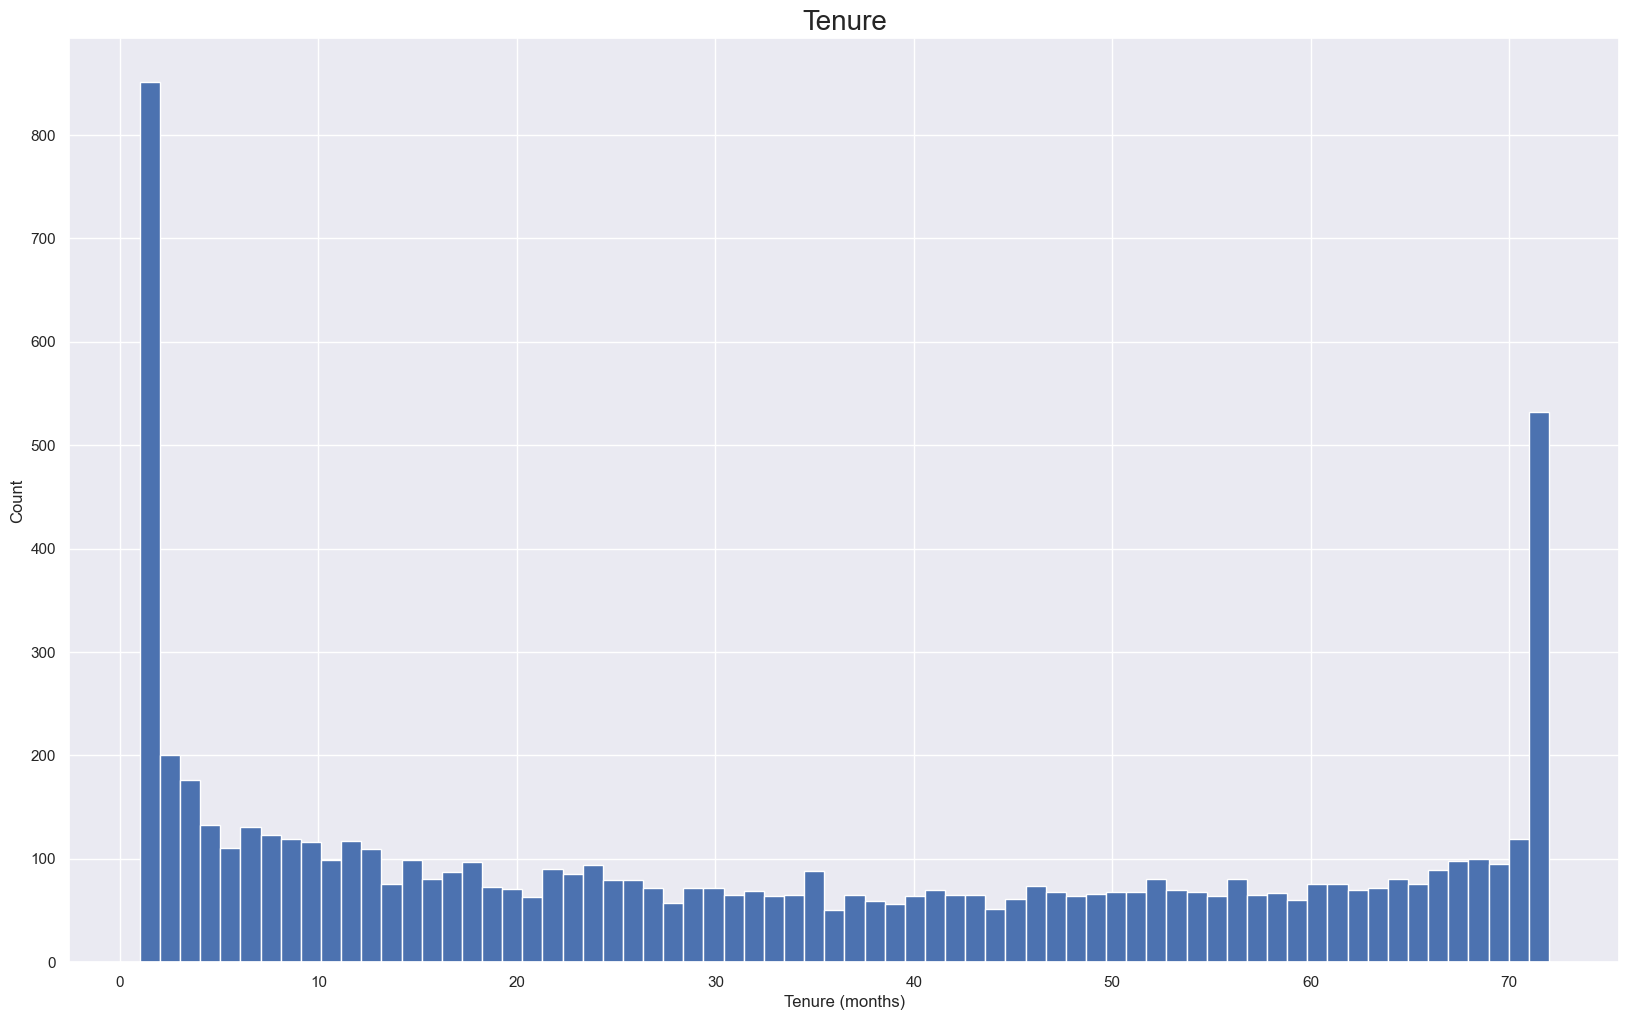

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize = [20,12])
plt.title('Tenure', fontsize=20)
plt.hist(x="tenure", data = data, bins = 70) ## 在不同服务月数下，分别有多少客户
plt. xlabel('Tenure (months)')
plt.ylabel('Count')
plt.show()

### 使用业务月数对客户流失的影响

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

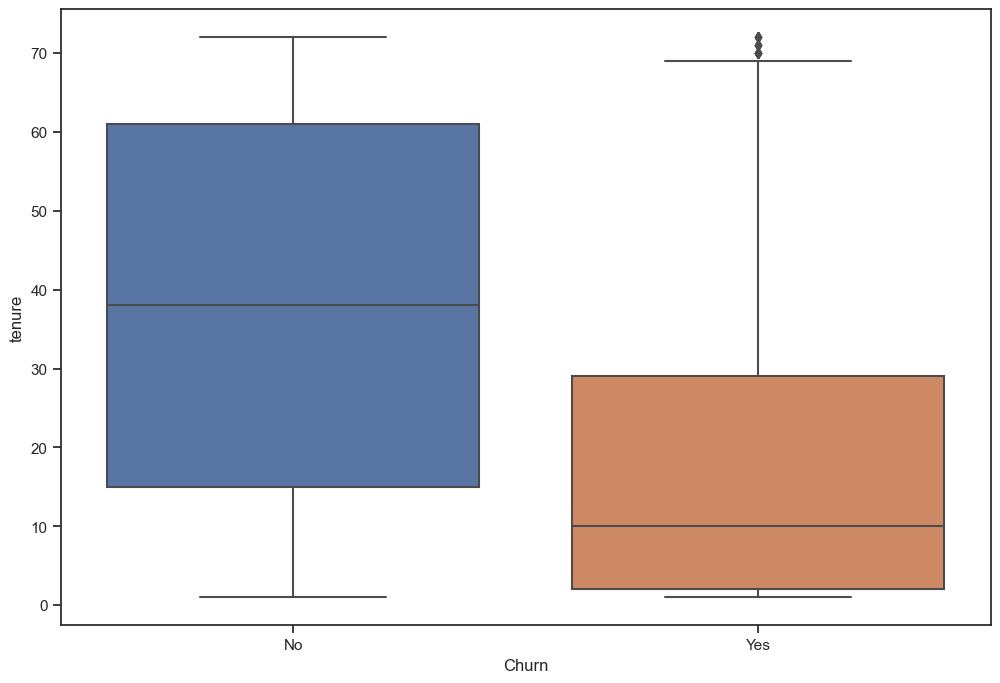

In [20]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('ticks') 
# style: dict, or one of {darkgrid, whitegrid, dark, white, ticks} A dictionary of parameters or the name of a preconfigured style.
sns.boxplot(x = "Churn", y = "tenure", data = data) 

### 3.2 电话业务对客户流失的影响

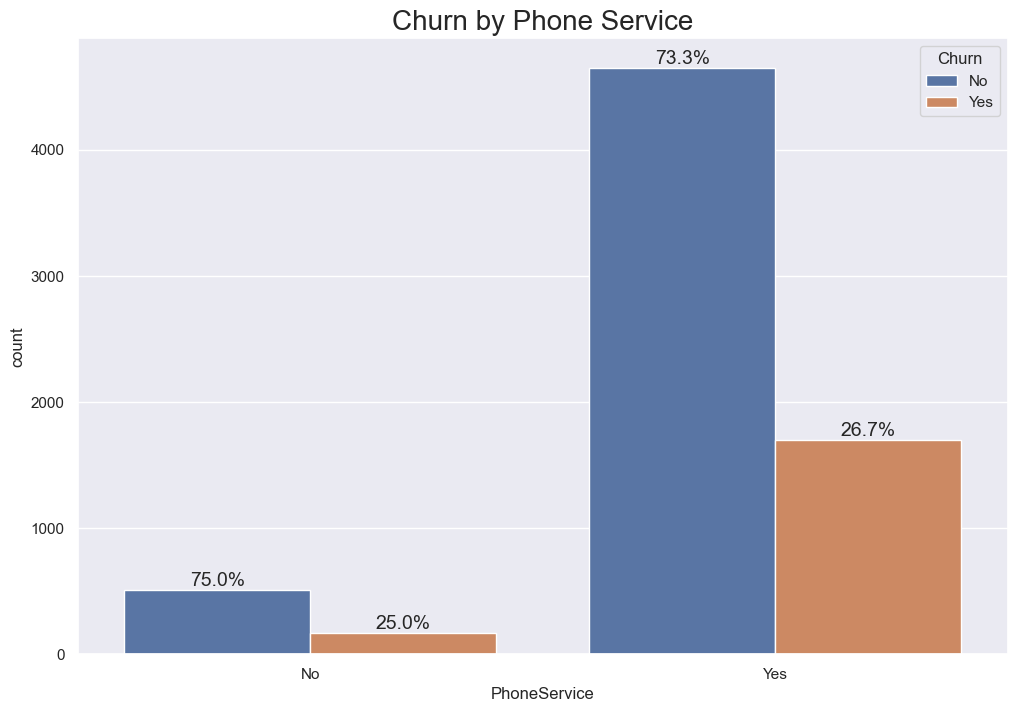

In [21]:
sns.set(rc={'figure.figsize':(12,8)})

#total = data["gender"].value_counts()
ax = sns.countplot(x = "PhoneService", hue = "Churn", data = data)
percentage_above_bar_relative_to_xgroup(ax)
# 设置图片标题
plt.title('Churn by Phone Service', fontsize=20)

    
plt.show()

In [22]:
data.groupby('PhoneService')['Churn'].value_counts(normalize=True)

PhoneService  Churn
No            No       0.750000
              Yes      0.250000
Yes           No       0.732525
              Yes      0.267475
Name: Churn, dtype: float64

### 开通多条电话线业务对客户流失的影响

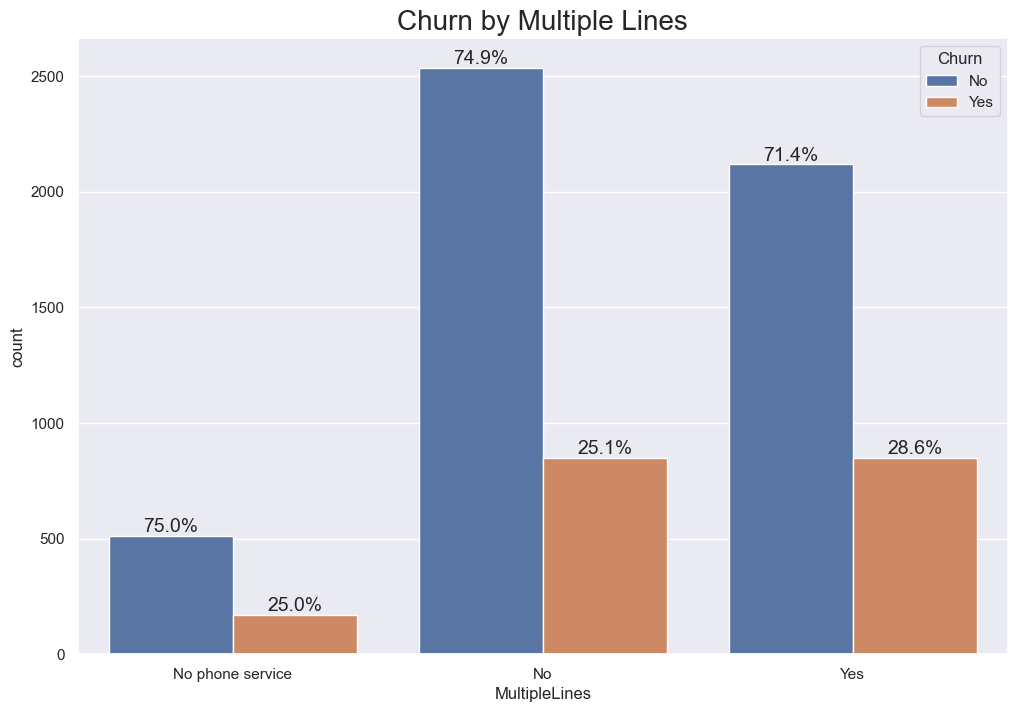

In [23]:
sns.set(rc={'figure.figsize':(12,8)})

#total = data["gender"].value_counts()
ax = sns.countplot(x = "MultipleLines", hue = "Churn", data = data)
percentage_above_bar_relative_to_xgroup(ax)
# 设置图片标题
plt.title('Churn by Multiple Lines', fontsize=20)

    
plt.show()

In [24]:
data.groupby('MultipleLines')['Churn'].value_counts(normalize=True)

MultipleLines     Churn
No                No       0.749188
                  Yes      0.250812
No phone service  No       0.750000
                  Yes      0.250000
Yes               No       0.713515
                  Yes      0.286485
Name: Churn, dtype: float64

### 3.3 网络服务（网络安全服务、在线备份业务、设备保护业务、技术支持服务、网络电视、网络电影）对客户流失的影响

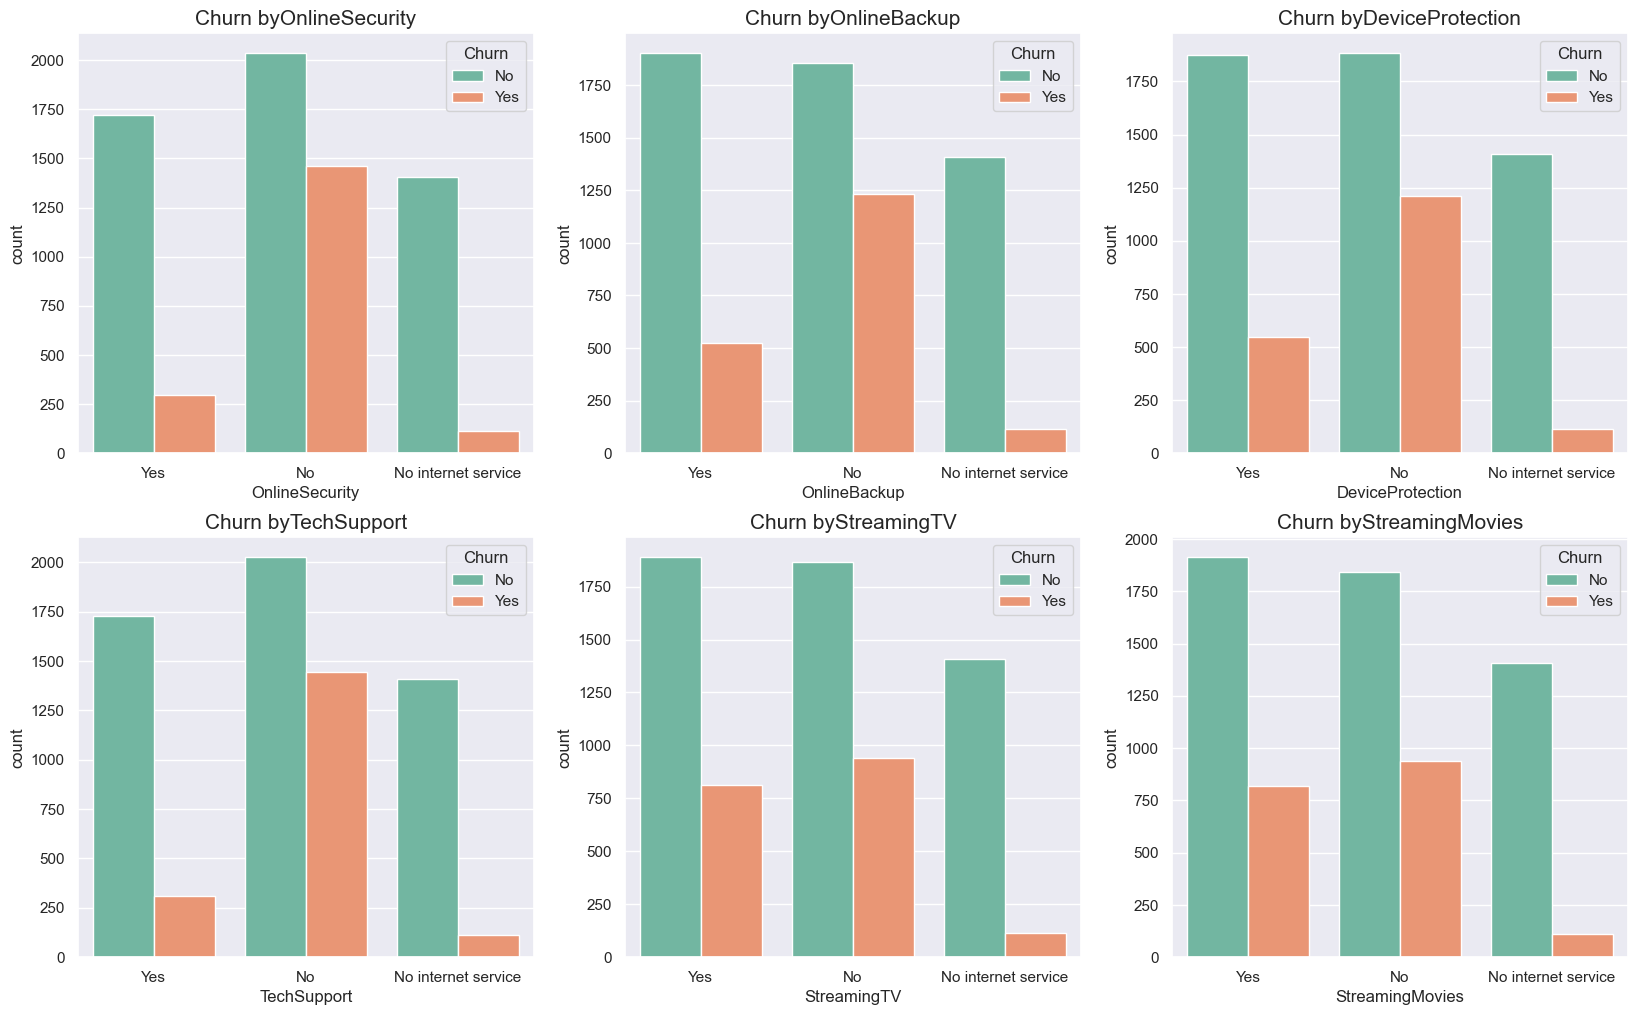

In [25]:
feature = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

plt.figure(figsize = [20,12])
for i, item in enumerate(feature):
    plt.subplot(2,3, (i+1)) ## (nrows, ncols, index) 子图：2行3列，i+1为位置index，从1开始
    ax = sns.countplot(x = item, hue = "Churn", data = data, palette = 'Set2', order = ['Yes', 'No', 'No internet service']) 
    plt.xlabel(str(item))
    plt.title('Churn by'+str(item), fontsize=15)
plt.show()

### 3.4 签订合同方式对客户流失的影响

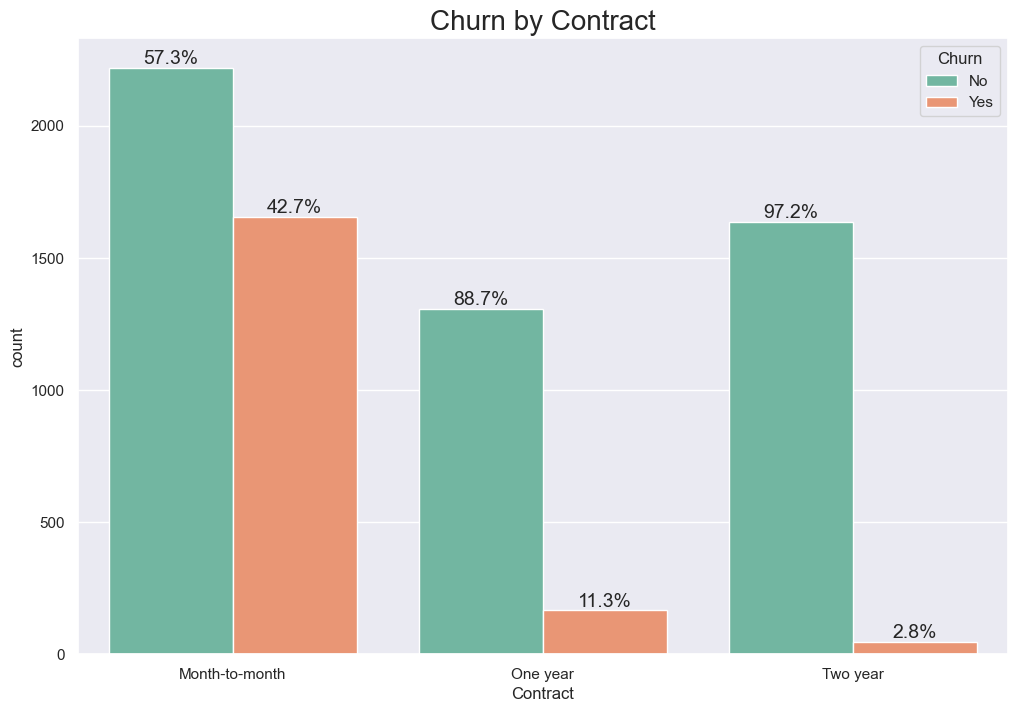

In [26]:
sns.set(rc={'figure.figsize':(12,8)})

ax = sns.countplot(x = "Contract", hue = "Churn", data = data, palette = 'Set2')
percentage_above_bar_relative_to_xgroup(ax)
# 设置图片标题
plt.title('Churn by Contract', fontsize=20)

    
plt.show()

In [27]:
data.groupby('Contract')['Churn'].value_counts(normalize=True)

Contract        Churn
Month-to-month  No       0.572903
                Yes      0.427097
One year        No       0.887228
                Yes      0.112772
Two year        No       0.971513
                Yes      0.028487
Name: Churn, dtype: float64

### 3.5 电子账单对客户流失的影响

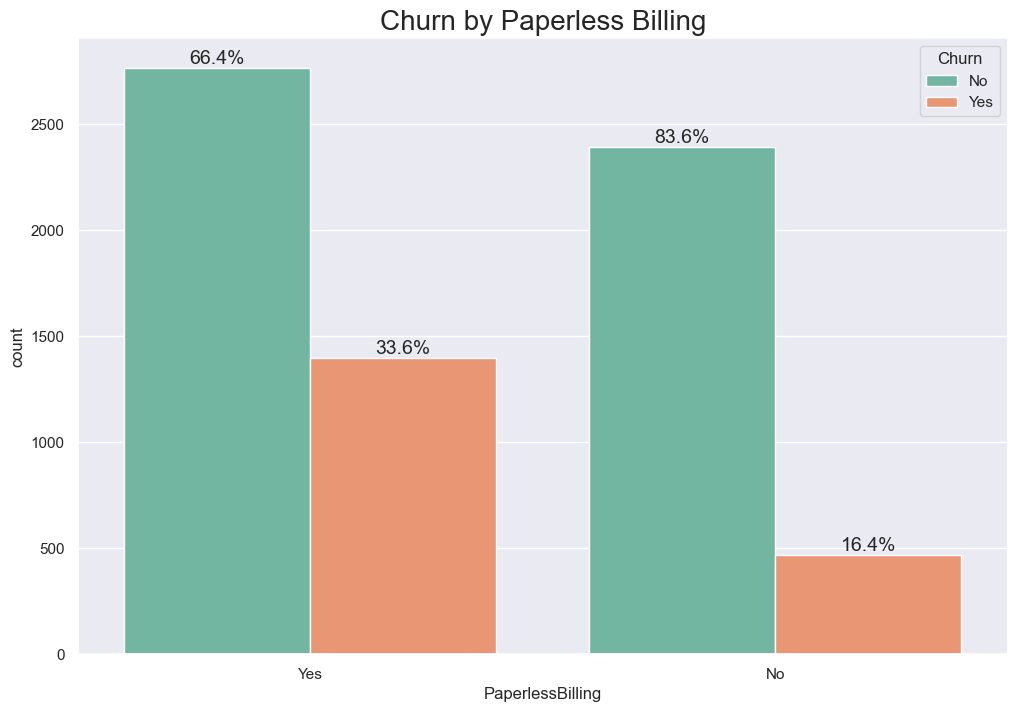

In [28]:
sns.set(rc={'figure.figsize':(12,8)})

ax = sns.countplot(x = "PaperlessBilling", hue = "Churn", data = data, palette = 'Set2')
percentage_above_bar_relative_to_xgroup(ax)
# 设置图片标题
plt.title('Churn by Paperless Billing', fontsize=20)

    
plt.show()

In [29]:
data.groupby('PaperlessBilling')['Churn'].value_counts(normalize=True)

PaperlessBilling  Churn
No                No       0.836243
                  Yes      0.163757
Yes               No       0.664107
                  Yes      0.335893
Name: Churn, dtype: float64

### 3.6 付款方式对客户流失的影响

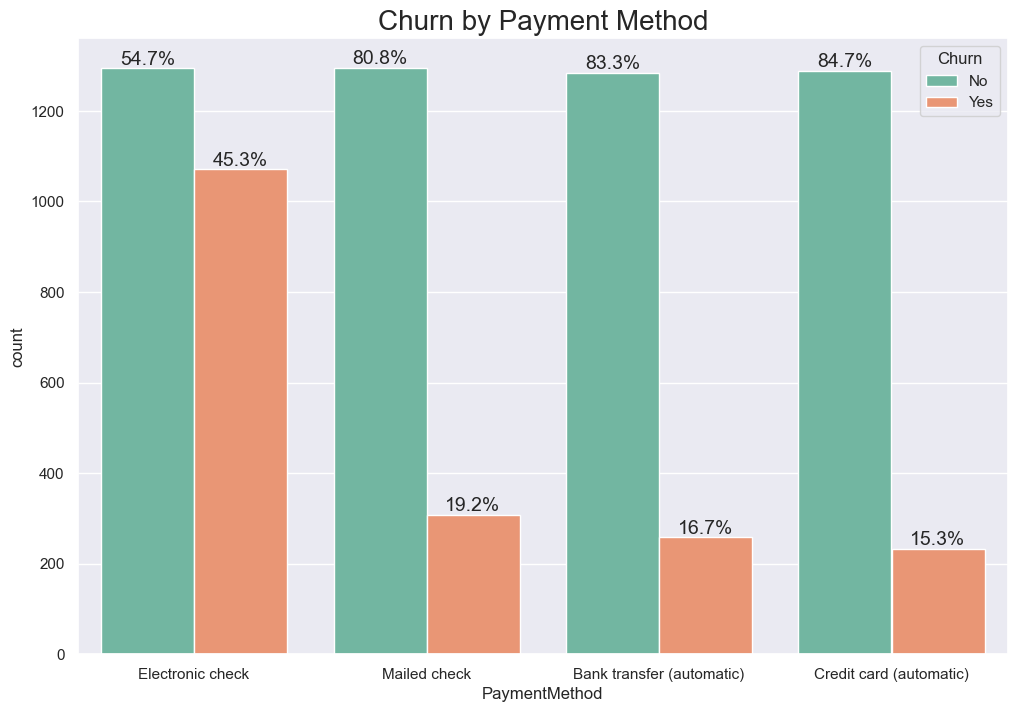

In [30]:
sns.set(rc={'figure.figsize':(12,8)})

ax = sns.countplot(x = "PaymentMethod", hue = "Churn", data = data, palette = 'Set2')
percentage_above_bar_relative_to_xgroup(ax)
# 设置图片标题
plt.title('Churn by Payment Method', fontsize=20)

    
plt.show()

In [31]:
data.groupby('PaymentMethod')['Churn'].value_counts(normalize=True)

PaymentMethod              Churn
Bank transfer (automatic)  No       0.832685
                           Yes      0.167315
Credit card (automatic)    No       0.847469
                           Yes      0.152531
Electronic check           No       0.547146
                           Yes      0.452854
Mailed check               No       0.807980
                           Yes      0.192020
Name: Churn, dtype: float64

### 3.7 费用对客户流失的影响

### 月费用

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

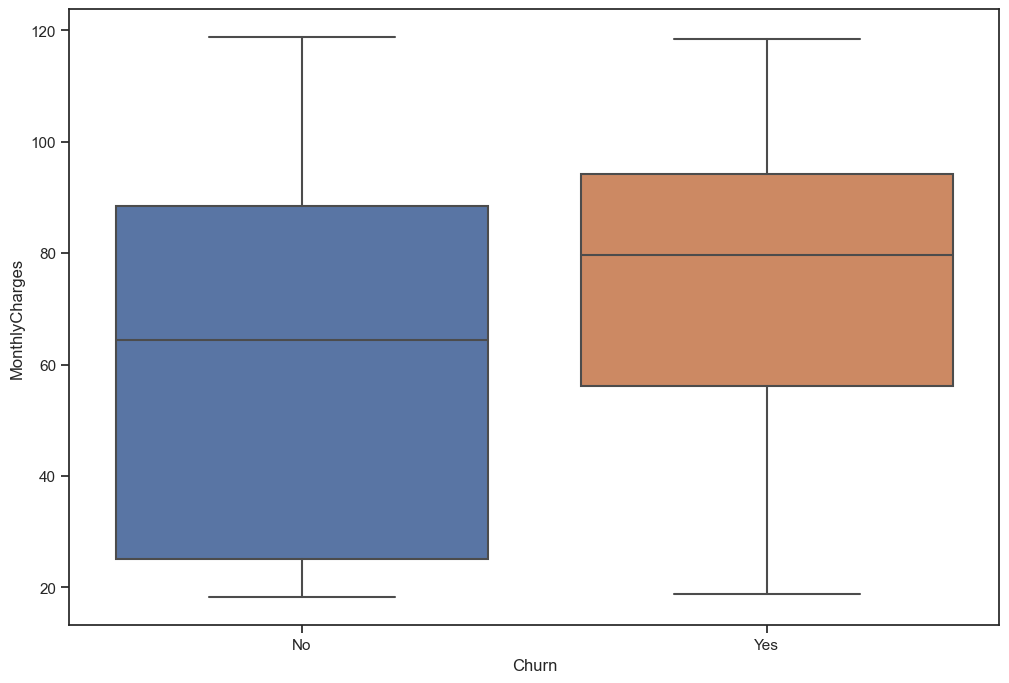

In [32]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('ticks') 
# style: dict, or one of {darkgrid, whitegrid, dark, white, ticks} A dictionary of parameters or the name of a preconfigured style.
sns.boxplot(x = "Churn", y = "MonthlyCharges", data = data) 

### 总费用

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

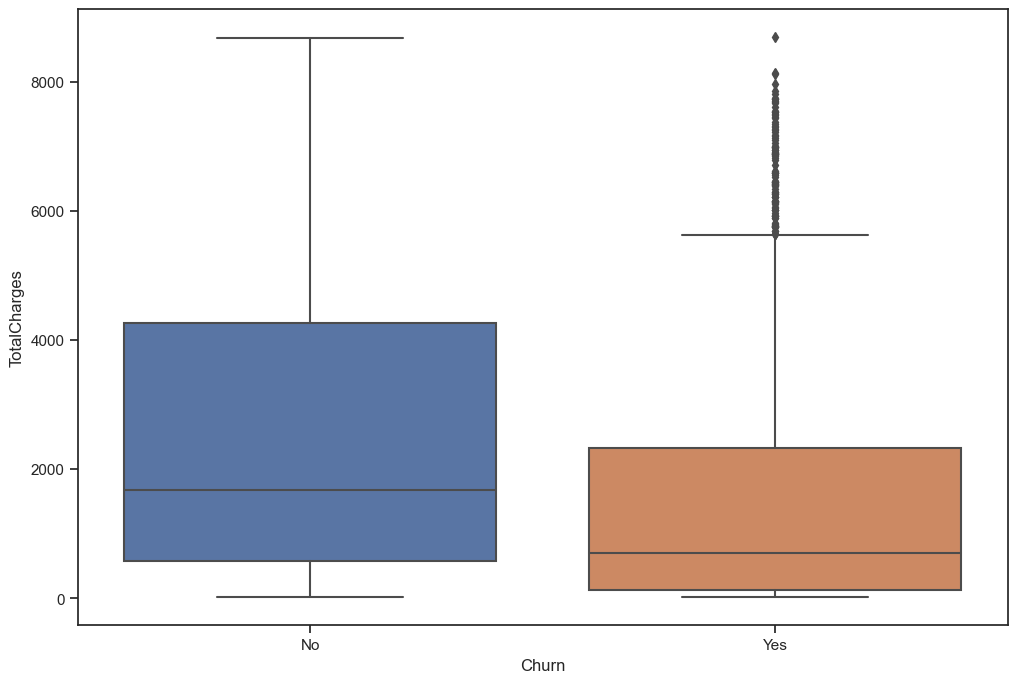

In [33]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('ticks') 
# style: dict, or one of {darkgrid, whitegrid, dark, white, ticks} A dictionary of parameters or the name of a preconfigured style.
sns.boxplot(x = "Churn", y = "TotalCharges", data = data) 

## 4. 特征与客户流失之间的相关性

In [34]:
data = data.drop(['customerID'], axis=1)  ## 去掉ID
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


### 将输出Y：Churn变成0、1

In [35]:
data['Churn'].replace(to_replace = 'Yes', value = 1, inplace = True)
data['Churn'].replace(to_replace = 'No', value = 0, inplace = True)

### 将分类变量变成虚拟变量

In [36]:
data = pd.get_dummies(data, drop_first=True, dtype=int)  ## 将分类变量变成虚拟变量
data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


### 各特征与客户流失之间的相关性

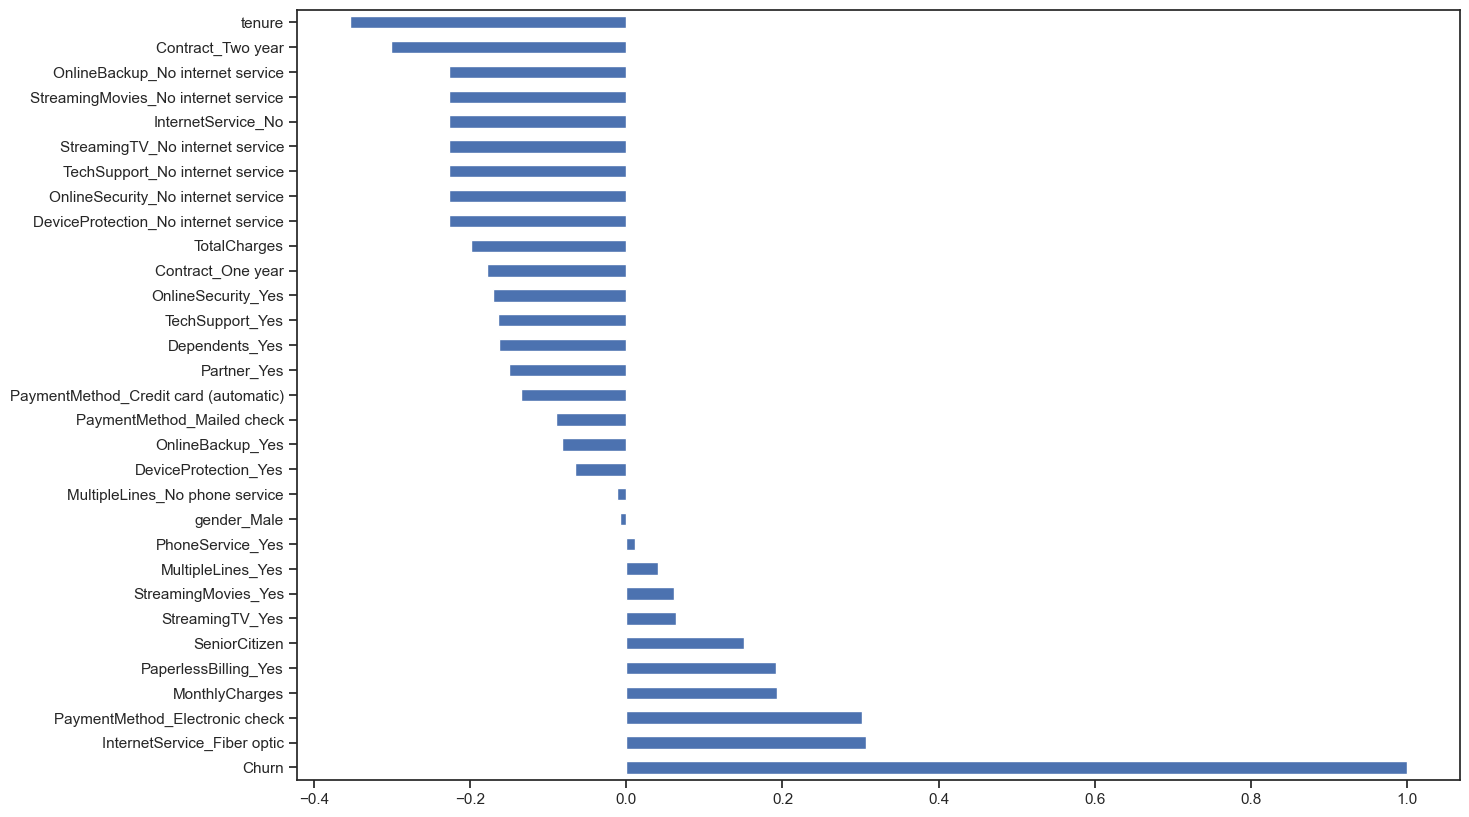

In [37]:
plt.figure(figsize=(15,10))
data.corr()['Churn'].sort_values(ascending = False).plot(kind='barh')
plt.show()

### 相关性矩阵

In [38]:
corr = data.corr()
corr

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,0.150541,-0.001819,0.016957,-0.210550,0.008392,-0.008392,...,-0.182519,0.105445,-0.182519,0.119842,-0.046491,-0.116205,0.156258,-0.024359,0.171322,-0.152987
tenure,0.015683,1.000000,0.246862,0.825880,-0.354049,0.005285,0.381912,0.163386,0.007877,-0.007877,...,-0.037529,0.280264,-0.037529,0.285402,0.202338,0.563801,0.004823,0.232800,-0.210197,-0.232181
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,0.192858,-0.013779,0.097825,-0.112343,0.248033,-0.248033,...,-0.763191,0.629668,-0.763191,0.627235,0.004810,-0.073256,0.351930,0.030055,0.271117,-0.376568
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.199484,0.000048,0.319072,0.064653,0.113008,-0.113008,...,-0.374878,0.515709,-0.374878,0.519867,0.170569,0.358036,0.157830,0.182663,-0.060436,-0.294708
Churn,0.150541,-0.354049,0.192858,-0.199484,1.000000,-0.008545,-0.149982,-0.163128,0.011691,-0.011691,...,-0.227578,0.063254,-0.227578,0.060860,-0.178225,-0.301552,0.191454,-0.134687,0.301455,-0.090773
gender_Male,-0.001819,0.005285,-0.013779,0.000048,-0.008545,1.000000,-0.001379,0.010349,-0.007515,0.007515,...,0.004745,-0.007124,0.004745,-0.010105,0.007755,-0.003603,-0.011902,0.001632,0.000844,0.013199
Partner_Yes,0.016957,0.381912,0.097825,0.319072,-0.149982,-0.001379,1.000000,0.452269,0.018397,-0.018397,...,-0.000286,0.124483,-0.000286,0.118108,0.083067,0.247334,-0.013957,0.082327,-0.083207,-0.096948
Dependents_Yes,-0.210550,0.163386,-0.112343,0.064653,-0.163128,0.010349,0.452269,1.000000,-0.001078,0.001078,...,0.138383,-0.016499,0.138383,-0.038375,0.069222,0.201699,-0.110131,0.061134,-0.149274,0.056448
PhoneService_Yes,0.008392,0.007877,0.248033,0.113008,0.011691,-0.007515,0.018397,-0.001078,1.000000,-1.000000,...,0.171817,-0.021383,0.171817,-0.033477,-0.003142,0.004442,0.016696,-0.006916,0.002747,-0.004463
MultipleLines_No phone service,-0.008392,-0.007877,-0.248033,-0.113008,-0.011691,0.007515,-0.018397,0.001078,-1.000000,1.000000,...,-0.171817,0.021383,-0.171817,0.033477,0.003142,-0.004442,-0.016696,0.006916,-0.002747,0.004463


### 用热地图(heatmap)显示相关系数

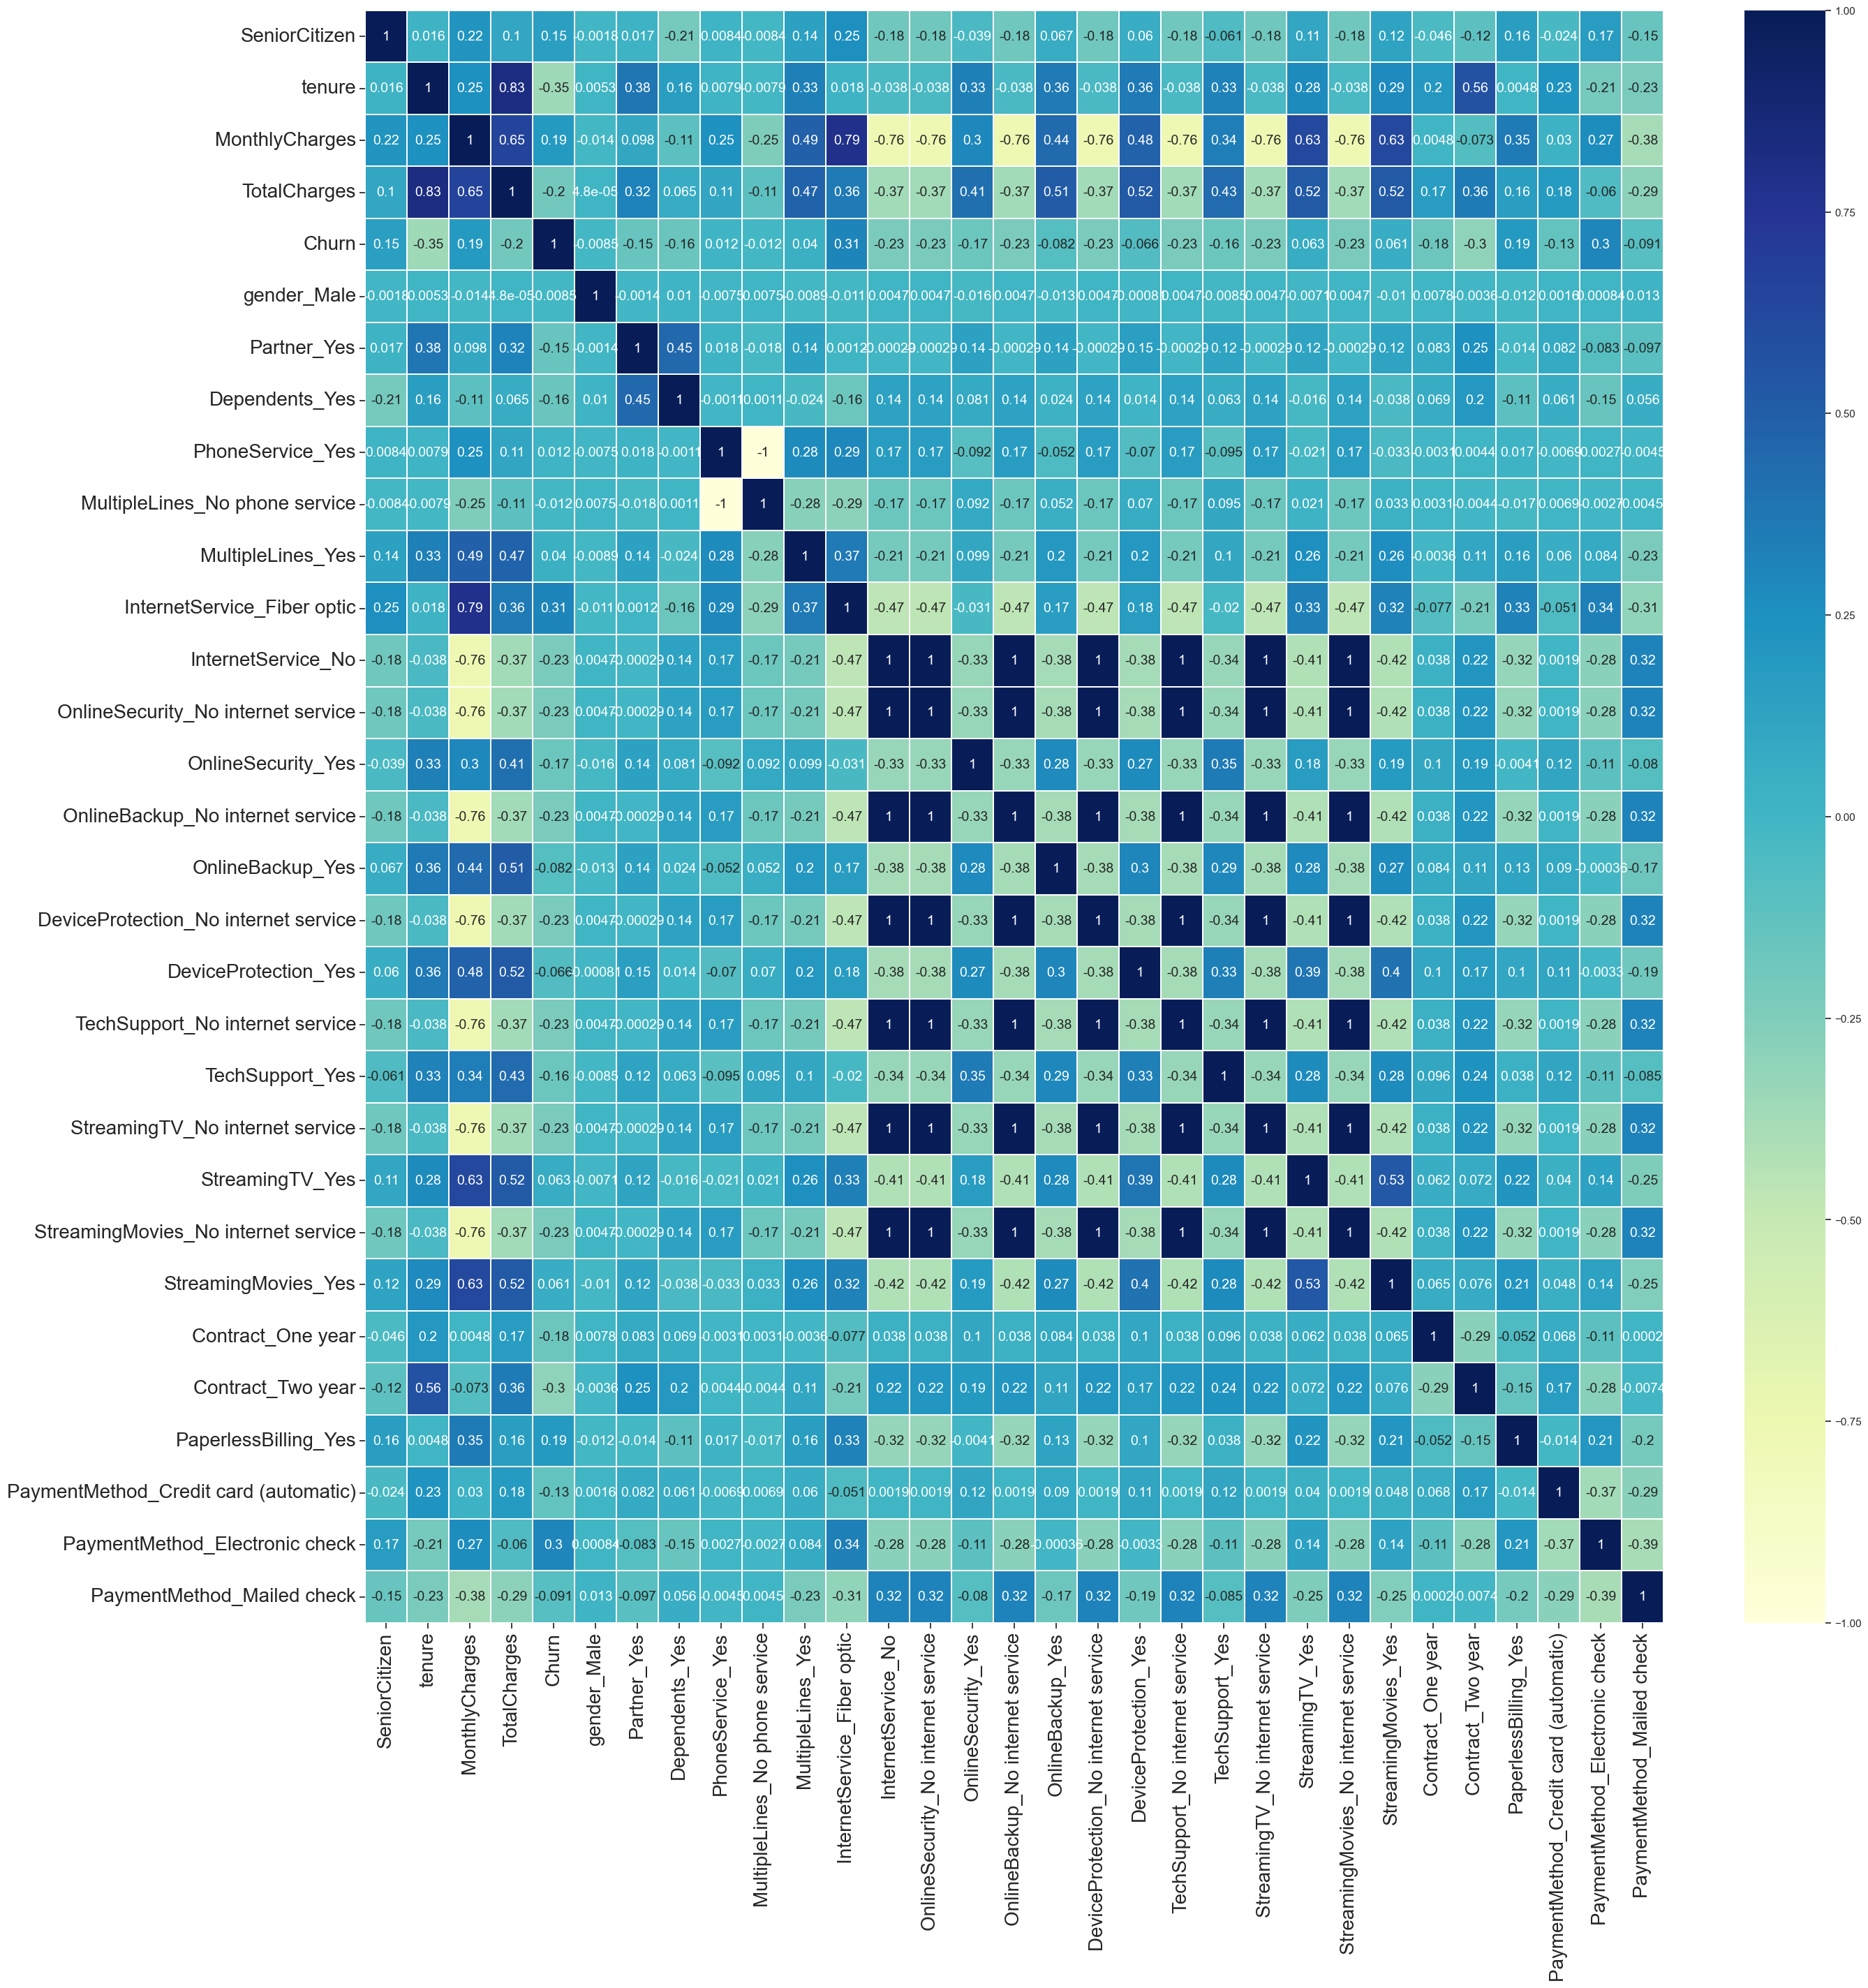

In [39]:
plt.figure(figsize = (30, 30))
ax = sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, linewidth = 0.2, cmap = 'YlGnBu', annot = True, annot_kws={"fontsize":14}) ## annot_kws: 标注字体大小
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 20) ## 增大x轴标签的大小
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 20) ## 增大y轴标签的大小
plt.show()